# AI Project: Neural Network

#### Supervisors: Prof. Stéphane Marchand-Maillet, Assist. Vincent Micheli, Assist. Margarita Liarou

#### Students: CHRISTOFOROU Anthony Phillipous, VANSON Nathan Soufianus, WILLIAM Christian Athenaous, RASHIDI Massi Mohammedeous
---

In [1]:
# Libraries
import warnings
import matplotlib
import numpy as np
import pandas as pd
from itertools import product
from ucimlrepo import fetch_ucirepo
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Modules
from ai_nn_project.utils.tuning import grid_search_knn, grid_search_mlp, parallel_grid_search_knn, parallel_grid_search_mlp
from ai_nn_project.models.neigbours.knn import KNN
from ai_nn_project.utils.visualisation import visualize_weights
from ai_nn_project.utils.activations import Sigmoid, ReLU, Linear
from ai_nn_project.models.neuronal_network.multilayer_perceptron import MLP
from ai_nn_project.utils.evaluations import accuracy, precision, recall, f1_score, mse_loss, mae_loss, rmse_loss, mape_loss, r2_score

# make figures appear inline
matplotlib.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/tmp/ipykernel_9779/884072466.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---

## Introduction

## Data Preprocessing

### Mushroom Dataset: Classification

In [2]:
# fetch dataset

# Mushroom. (1987). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.
mushroom = fetch_ucirepo(id=73) 

In [3]:
# pandas dataframe
mushroom_X = mushroom.data.features
mushroom_y = mushroom.data.targets

In [4]:
mushroom_X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushroom_y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [6]:
# Encode categorical features as a one-hot numeric array: Gives a unique number to each category
fe = OneHotEncoder()
le = LabelEncoder() # Gives a unique number to each category

mushroom_X_encoded = fe.fit_transform(mushroom_X).toarray()
mushroom_y_encoded = mushroom_y.apply(le.fit_transform).to_numpy()

# Split the dataset into train and test set
mushroom_X_train, mushroom_X_temp, mushroom_y_train, mushroom_y_temp = train_test_split(mushroom_X_encoded, mushroom_y_encoded, test_size=0.4, random_state=42)
# Split the test set into validation and test set
mushroom_X_val, mushroom_X_test, mushroom_y_val, mushroom_y_test = train_test_split(mushroom_X_temp, mushroom_y_temp, test_size=0.5, random_state=42)

### Wine Dataset: Regression

In [7]:
# Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.
wine_quality = fetch_ucirepo(id=186)

In [8]:
wine_X = wine_quality.data.features
wine_y = wine_quality.data.targets

In [9]:
wine_X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
wine_y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [11]:
scaler = StandardScaler()
wine_X_scaled = scaler.fit_transform(wine_X)
wine_y_scaled = wine_y.to_numpy()

# First split: Separate out a training set and a temporary set
wine_X_train, wine_X_temp, wine_y_train, wine_y_temp = train_test_split(wine_X_scaled, wine_y_scaled, test_size=0.4, random_state=42)

# Second split: Divide the temporary set into validation and test sets
wine_X_val, wine_X_test, wine_y_val, wine_y_test = train_test_split(wine_X_temp, wine_y_temp, test_size=0.5, random_state=42)

## Hyperparameter Tuning

### Classification

### K-Nearest Neighbors

In [12]:
param_grid = {
    'k': [3, 5, 15, 50, 100, 200],
}

fixed_params = {
    'mode': 'classification'
}

knn_best_param, knn_best_score, knn_results = parallel_grid_search_knn(accuracy, mushroom_X_train, mushroom_y_train, mushroom_X_val, mushroom_y_val, param_grid, fixed_params)

KNN Grid Search:   0%|          | 0/6 [00:00<?, ?it/s]

In [13]:
print("Best parameter: ", knn_best_param)
print("Best score: ", knn_best_score)

Best parameter:  {'k': 3}
Best score:  1.0


### Multi-Layer Perceptron

In [14]:
layer_sizes_options = [32, 64, 128]
max_layers = 3  #exploring up to 3 hidden layers

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # List of learning rates to try
    'batch_size': [1],  # List of batch sizes to try
    'epochs': [32, 64, 128],  # List of epochs to try
    'layer_sizes': [[mushroom_X_train.shape[1]] + list(combo) + [1] for num_layers in range(2, max_layers + 1) for combo in product(layer_sizes_options, repeat=num_layers)]
}

fixed_params = {
    'final_activation': Sigmoid(),
}

best_param, best_score, results = parallel_grid_search_mlp(mushroom_X_train, mushroom_y_train, mushroom_X_val, mushroom_y_val, param_grid, fixed_params)

MLP Grid Search:   0%|          | 0/324 [00:00<?, ?it/s]

In [15]:
print("Best parameter: ", best_param)
print("Best score: ", best_score)

Best parameter:  {'learning_rate': 0.1, 'batch_size': 1, 'epochs': 32, 'layer_sizes': [117, 64, 64, 32, 1], 'activation_objects': [<ai_nn_project.utils.activations.ReLU object at 0x7f2610d6ae30>, <ai_nn_project.utils.activations.ReLU object at 0x7f2610d6ae90>, <ai_nn_project.utils.activations.ReLU object at 0x7f2610d6b670>, <ai_nn_project.utils.activations.Sigmoid object at 0x7f2610d69cc0>]}
Best score:  18.576978102957494


### Regression

### K-Nearest Neighbors

In [16]:
param_grid = {
    'k': [3, 5, 10, 50, 100, 200],
}

fixed_params = {
    'mode': 'regression'
}

knn_best_param_reg, knn_best_score_reg, knn_results_reg = parallel_grid_search_knn(accuracy, wine_X_train, wine_y_train, wine_X_val, wine_y_val, param_grid, fixed_params)

KNN Grid Search:   0%|          | 0/6 [00:00<?, ?it/s]

In [17]:
print("Best parameter: ", knn_best_param_reg)
print("Best score: ", knn_best_score_reg)

Best parameter:  {'k': 3}
Best score:  0.26712856043110084


### Multi-Layer Perceptron

In [18]:
layer_sizes_options = [32, 64, 128]
max_layers = 3  #exploring up to 3 hidden layers

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # List of learning rates to try
    'batch_size': [1],  # List of batch sizes to try
    'epochs': [32, 64, 128],  # List of epochs to try
    'layer_sizes': [[wine_X_train.shape[1]] + list(combo) + [1] for num_layers in range(2, max_layers + 1) for combo in product(layer_sizes_options, repeat=num_layers)]
}

fixed_params = {
    'final_activation': Linear(),
}

best_param_reg, best_score_reg, results_reg = parallel_grid_search_mlp(wine_X_train, wine_y_train, wine_X_val, wine_y_val, param_grid, fixed_params)

MLP Grid Search:   0%|          | 0/324 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print("Best parameter: ", best_param_reg)
print("Best score: ", best_score_reg)

Best parameter:  {'learning_rate': 0.001, 'batch_size': 32, 'epochs': 32, 'layer_sizes': [11, 64, 256, 1], 'activation_objects': [<ai_nn_project.utils.activations.ReLU object at 0x7f6567d66740>, <ai_nn_project.utils.activations.ReLU object at 0x7f6567d67ac0>, <ai_nn_project.utils.activations.Linear object at 0x7f6567d67af0>]}
Best score:  3.3941493456505003


## Baseline K-Nearest Neighbors: Classification

In [ ]:
knn = KNN(**knn_best_param)
knn.fit(mushroom_X_train, mushroom_y_train)
mushroom_output = knn.predict(mushroom_X_test)

In [ ]:
mushroom_output = mushroom_output.reshape(-1, 1)

print("Accuracy: ", accuracy(mushroom_y_test, mushroom_output))
print("Precision: ", precision(mushroom_y_test, mushroom_output))
print("Recall: ", recall(mushroom_y_test, mushroom_output))
print("F1-Score: ", f1_score(mushroom_y_test, mushroom_output))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-Score:  1.0


## Multi-Layer Perceptron: Classification

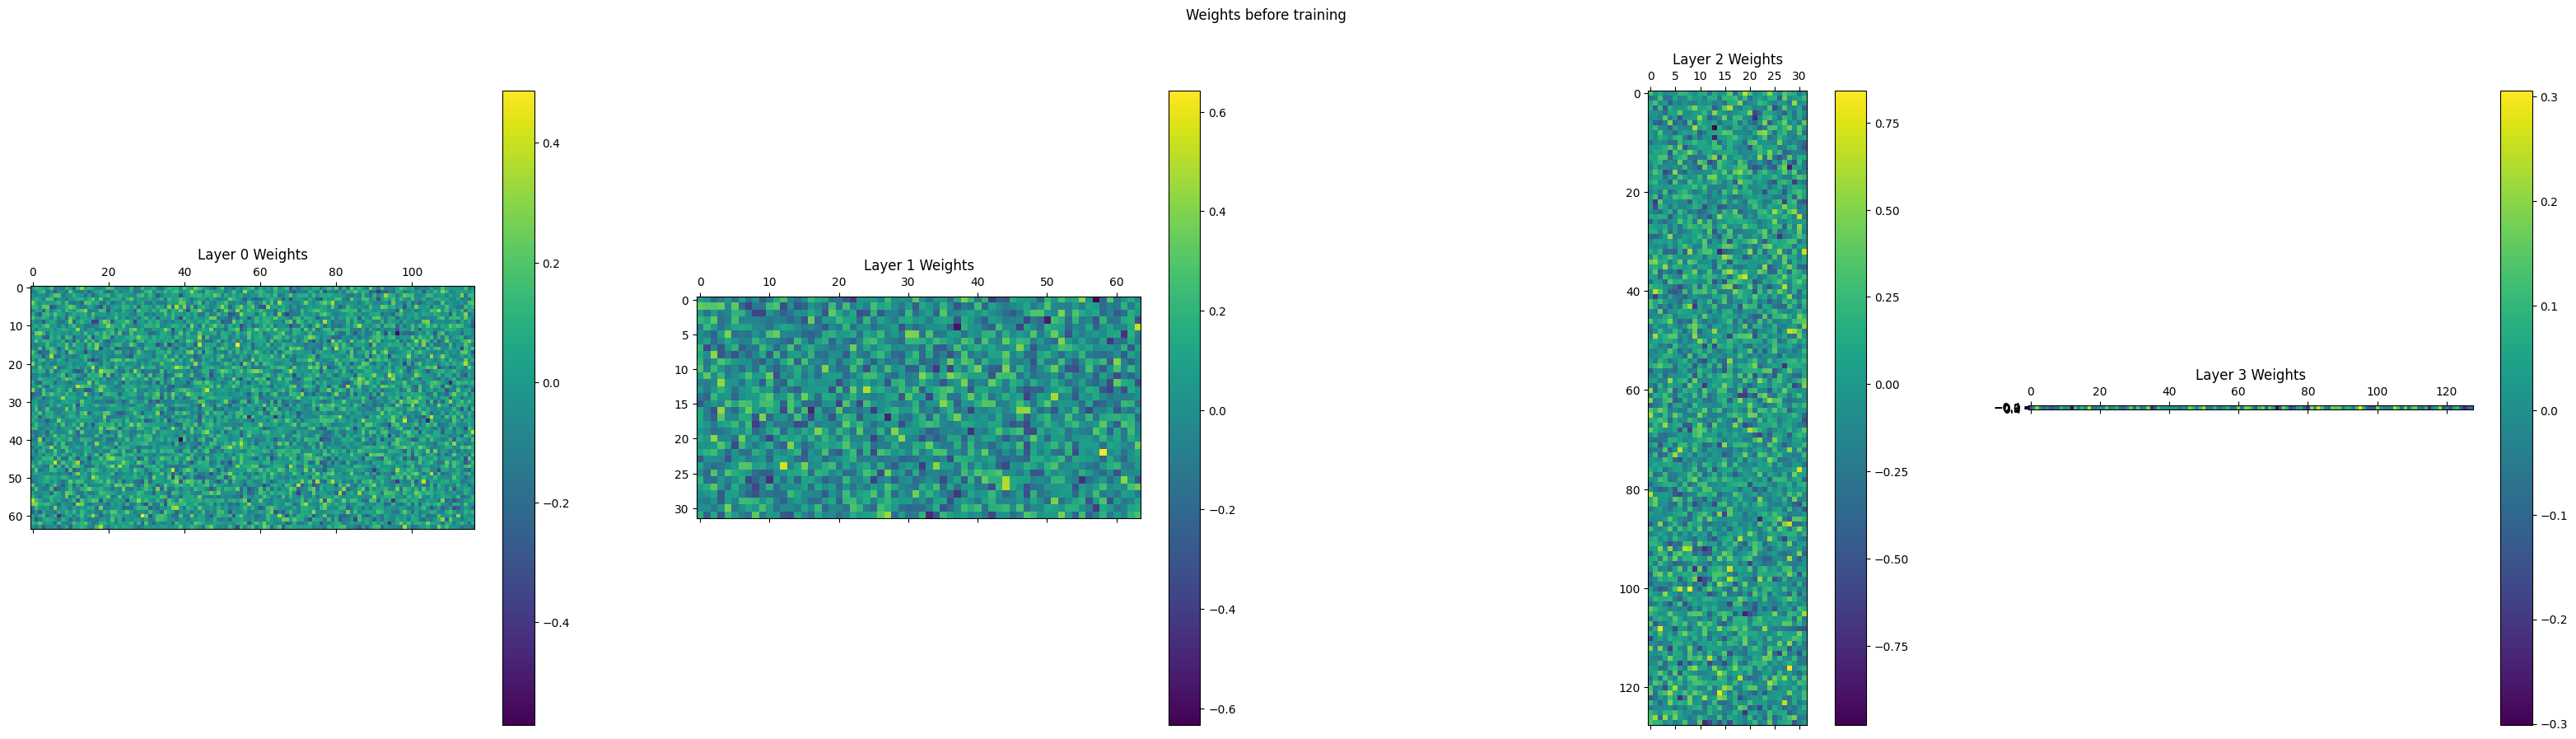

Training Progress:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 1/32 - {'cross_entropy_loss': 9.992007221626413e-16, 'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
Epoch 2/32 - {'cross_entropy_loss': 17.269389755964895, 'accuracy': 0.5, 'precision': 1.0, 'recall': 19.0, 'f1_score': 1.9}
Epoch 3/32 - {'cross_entropy_loss': 17.269406817543214, 'accuracy': 0.5, 'precision': 1.0, 'recall': 227.0, 'f1_score': 1.9912280701754386}
Epoch 4/32 - {'cross_entropy_loss': 4.258983416371947, 'accuracy': 0.87669265490357, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
Epoch 5/32 - {'cross_entropy_loss': 17.269470060220556, 'accuracy': 0.5, 'precision': 1.0, 'recall': 998.0, 'f1_score': 1.997997997997998}
Epoch 6/32 - {'cross_entropy_loss': 17.269494422185755, 'accuracy': 0.5, 'precision': 1.0, 'recall': 1295.0, 'f1_score': 1.998456790123457}
Epoch 7/32 - {'cross_entropy_loss': 23.725035570406433, 'accuracy': 0.31308986458760774, 'precision': 2.0, 'recall': 1526.0, 'f1_score': 3.994764397905759}
Epoch 8/32 - {'cross_entropy_loss': 17.2

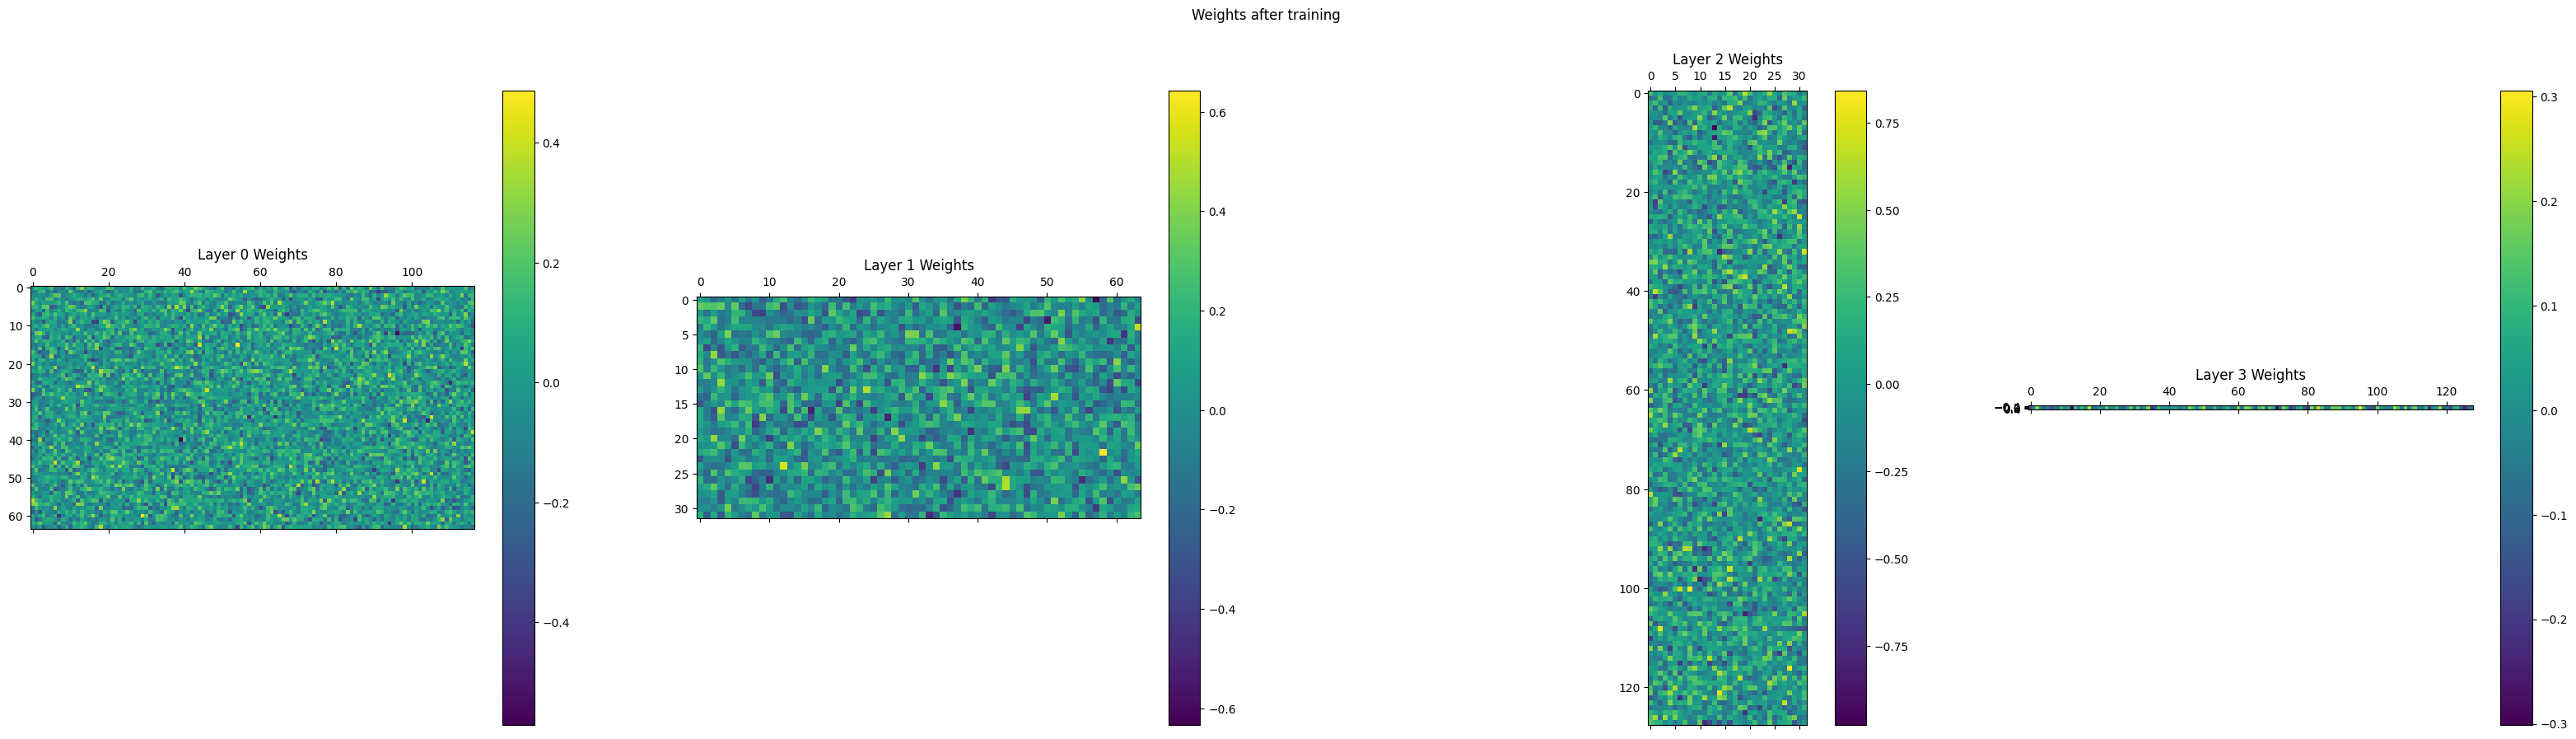

In [ ]:
mushroom_network = MLP(**best_param)

visualize_weights(mushroom_network, title="Weights before training")

metrics = mushroom_network.fit(mushroom_X_train, mushroom_y_train, verbose=True)

visualize_weights(mushroom_network, title="Weights after training")

In [ ]:
mushroom_output = mushroom_network.predict(mushroom_X_test.T)

# convert to binary
mushroom_output = np.where(mushroom_output >= 0.5, 1, 0)

print("Accuracy: ", accuracy(mushroom_y_test, mushroom_output.T))
print("Precision: ", precision(mushroom_y_test, mushroom_output.T))
print("Recall: ", recall(mushroom_y_test, mushroom_output.T))
print("F1-Score: ", f1_score(mushroom_y_test, mushroom_output.T))

Accuracy:  0.5766153846153846
Precision:  0.6160558464223386
Recall:  0.4299634591961023
F1-Score:  0.5064562410329986


## Baseline K-Nearest Neighbors: Regression

In [ ]:
knn = KNN(**knn_best_param_reg)
knn.fit(wine_X_train, wine_y_train)
wine_output = knn.predict(wine_X_test) 

In [ ]:
wine_output = np.round(wine_output).reshape(-1, 1)

print("Accuracy: ", accuracy(wine_y_test, wine_output))
print("MSE: ", mse_loss(wine_y_test, wine_output))

Accuracy:  0.5461538461538461
MSE:  0.7769230769230769


## Multi-Layer Perceptron: Reggression

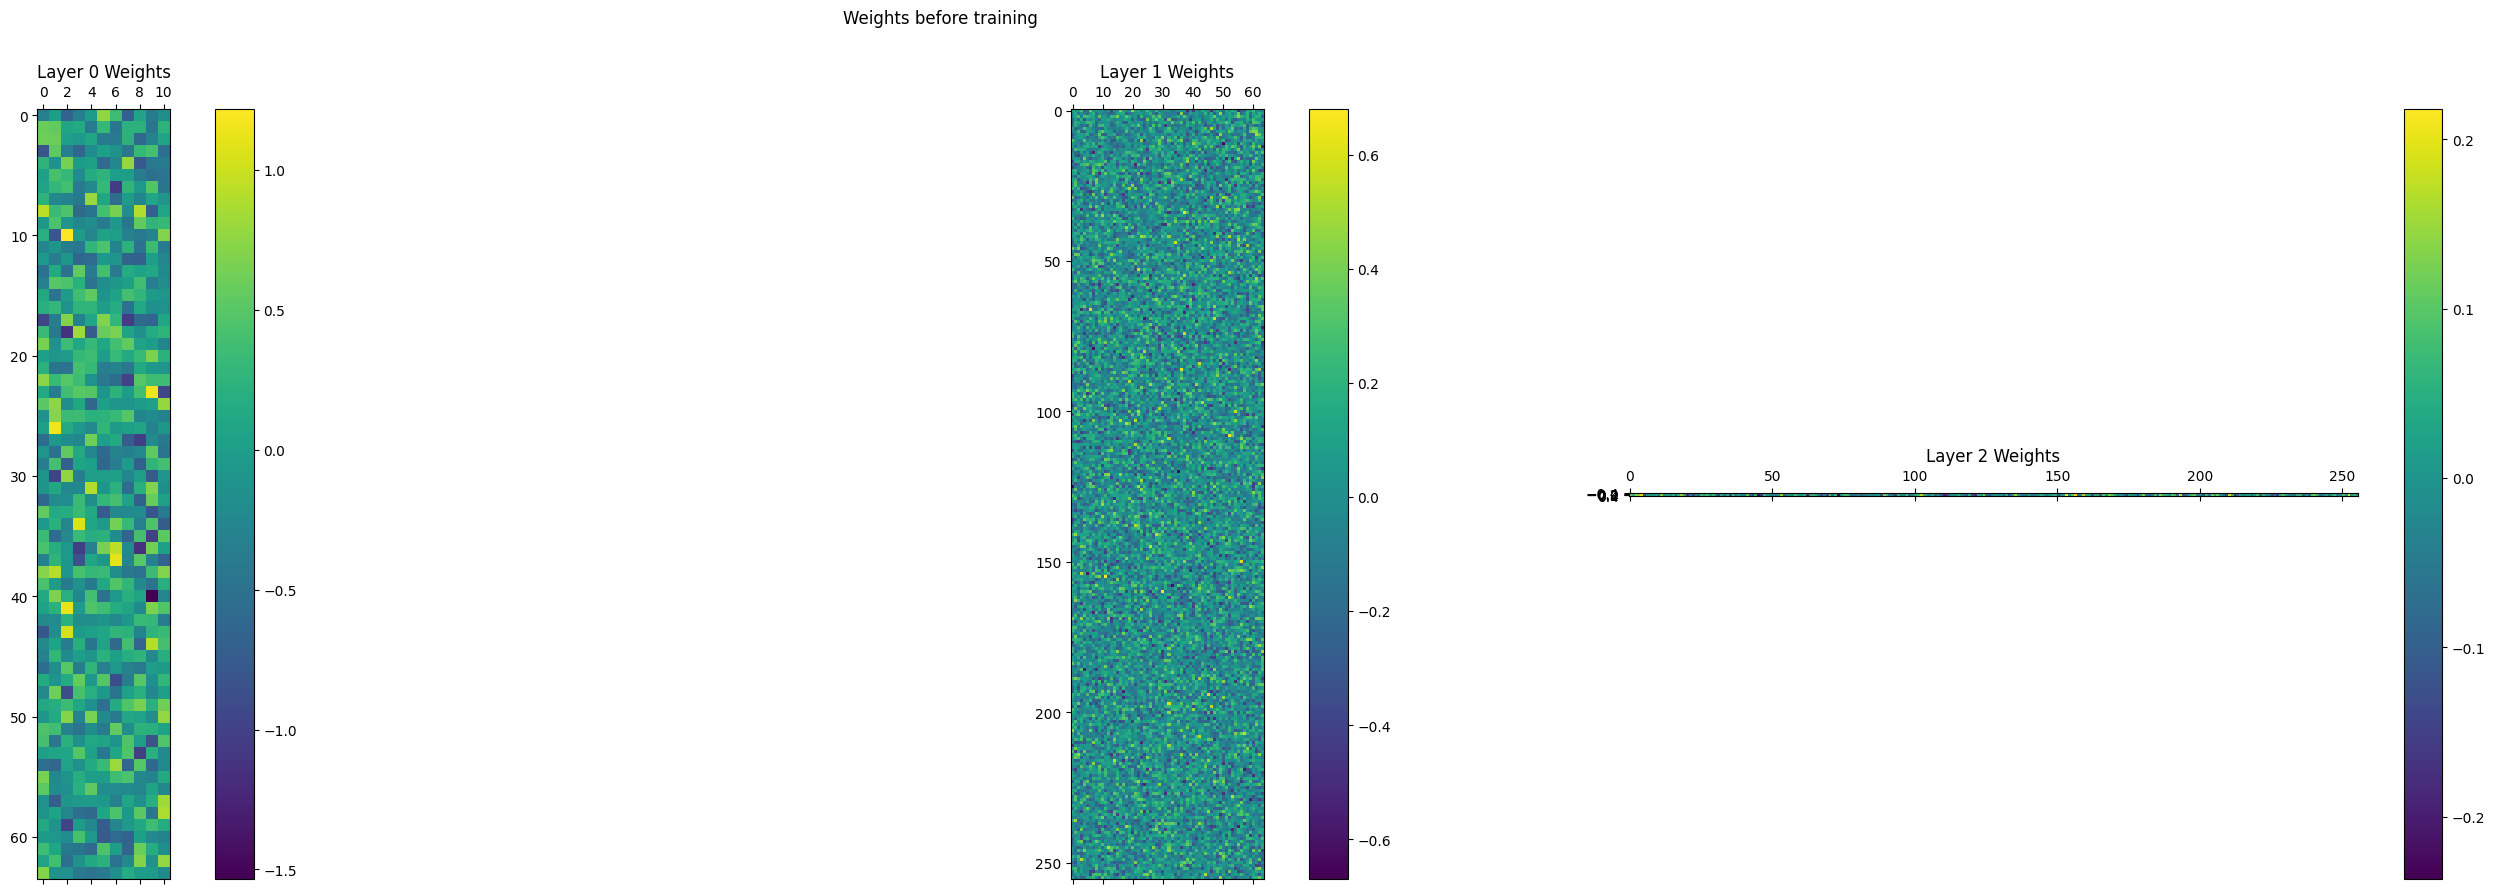

Training Progress:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 1/32 - {'accuracy': 0.01387299206693768, 'mse_loss': 22.45548012787623, 'mae_loss': 4.4380352843667366, 'mape_loss': 0.742373589712014, 'r2_score': -88051.48214285714}
Epoch 2/32 - {'accuracy': 0.04177684808777677, 'mse_loss': 11.968583494494219, 'mae_loss': 3.1360855665627345, 'mape_loss': 0.5500956628359256, 'r2_score': -66816.3559322034}
Epoch 3/32 - {'accuracy': 0.056952283222165216, 'mse_loss': 8.340509926194892, 'mae_loss': 2.585132415045191, 'mape_loss': 0.4401520362578481, 'r2_score': -84204.53256704981}
Epoch 4/32 - {'accuracy': 0.09737735327781505, 'mse_loss': 5.397679283261633, 'mae_loss': 1.9798910683979951, 'mape_loss': 0.33976372310180614, 'r2_score': -35204.80198019802}
Epoch 5/32 - {'accuracy': 0.14031850653194933, 'mse_loss': 4.5428622173106525, 'mae_loss': 1.774302403599479, 'mape_loss': 0.30269960926167117, 'r2_score': -18703.15625}
Epoch 6/32 - {'accuracy': 0.16148320637802424, 'mse_loss': 3.261337174882583, 'mae_loss': 1.4947704937443265, 'mape_loss': 0.25356

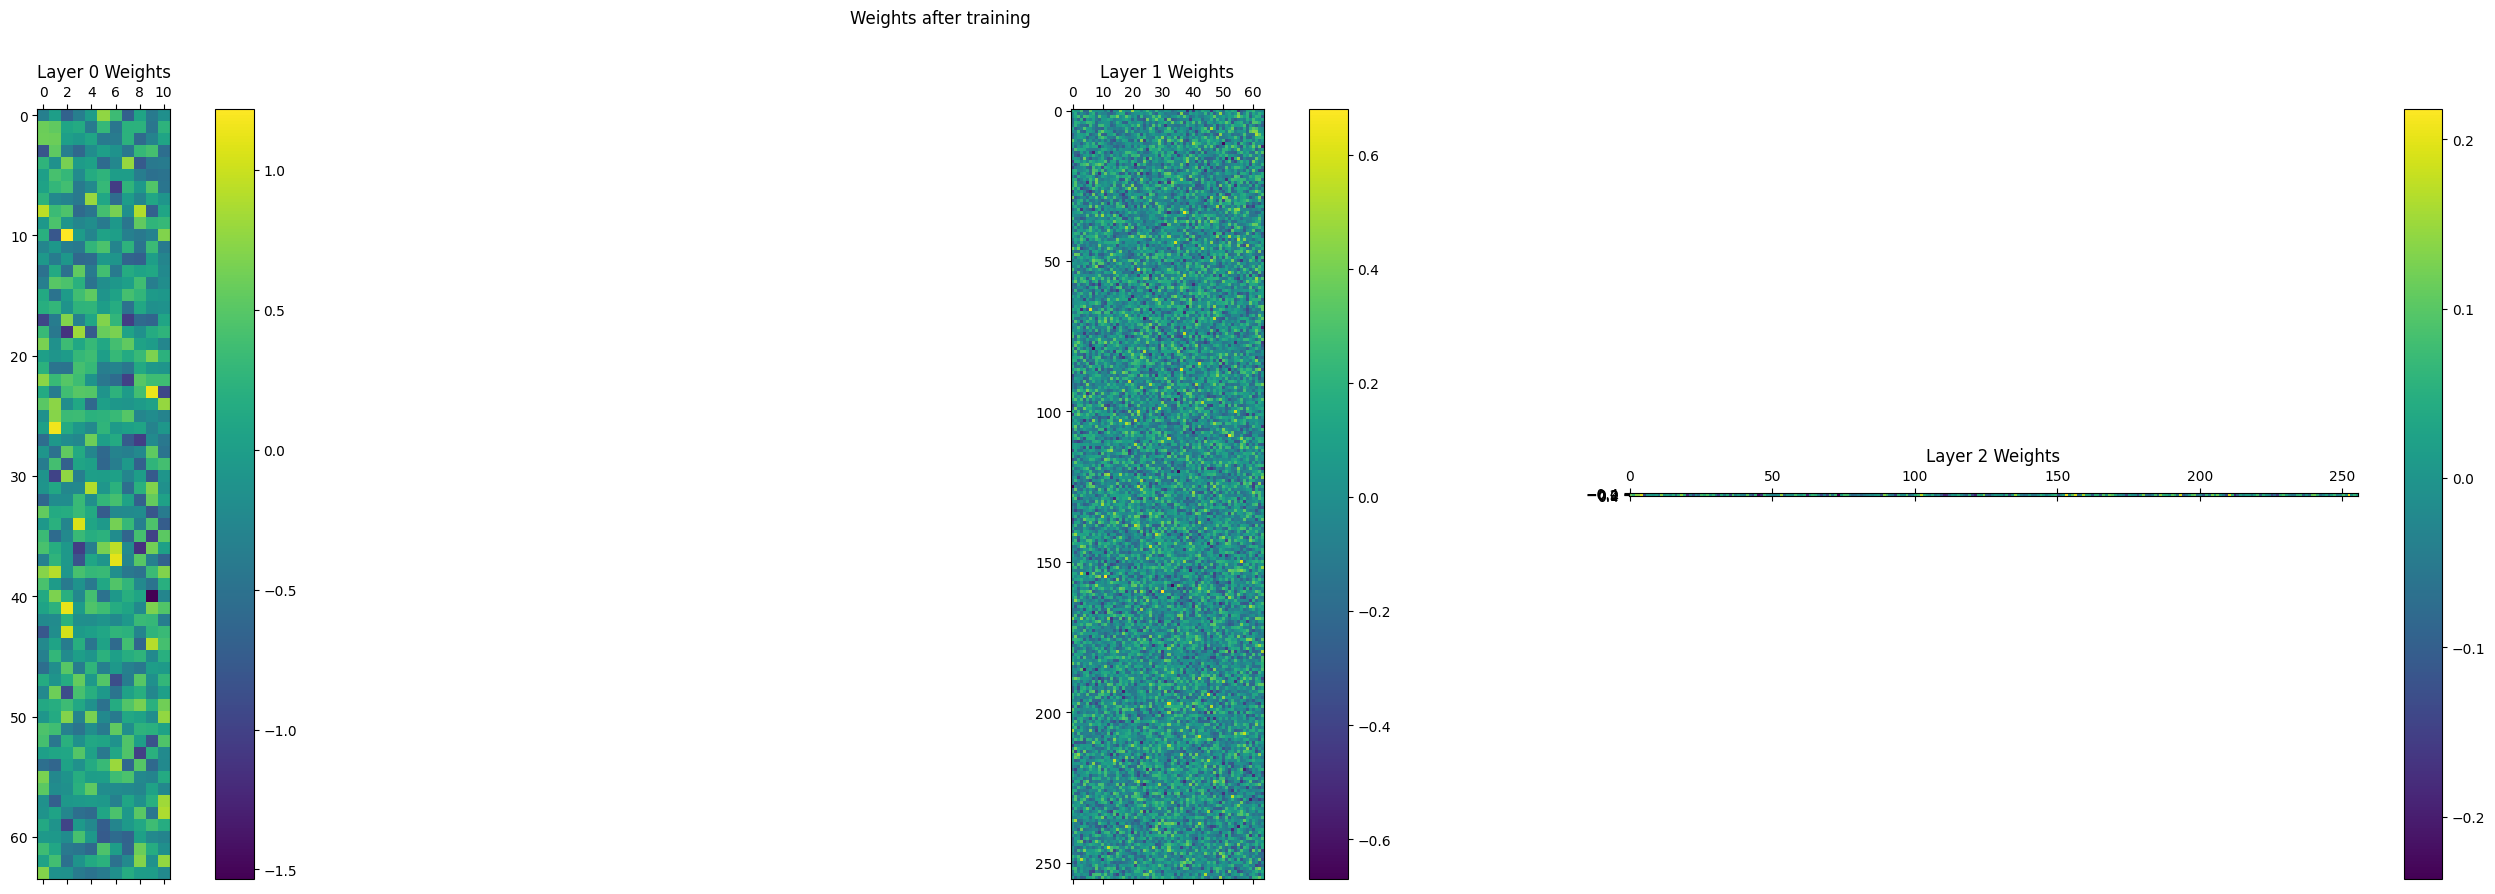

In [ ]:
mlp = MLP(**best_param_reg)

visualize_weights(mlp, title="Weights before training")

metrics = mlp.fit(wine_X_train, wine_y_train, verbose=True)

visualize_weights(mlp, title="Weights after training")

In [ ]:
wine_output = mlp.predict(wine_X_test.T) 
wine_output = np.round(wine_output)

print("Accuracy: ", accuracy(wine_y_test, wine_output.T))
print("MSE: ", mse_loss(wine_y_test, wine_output.T))
print("MAE: ", mae_loss(wine_y_test, wine_output.T))
print("RMSE: ", rmse_loss(wine_y_test, wine_output.T))
print("MAPE: ", mape_loss(wine_y_test, wine_output.T))
print("R2: ", r2_score(wine_y_test, wine_output.T))

Accuracy:  0.3046153846153846
MSE:  2.143076923076923
MAE:  1.063076923076923
RMSE:  1.463925176734427
MAPE:  0.19226953601590277
R2:  -1.7760404211352498


## Analysis

### Overfitting: Noise and Size Variation

#### Classification

Features Noise

In [ ]:
# add ndifferent level of noise to the dataset and see how the model performs
# add noise to the dataset
noises = [0.1, 0.2, 0.3, 0.4, 0.5]
mushroom_X_train_noisy = mushroom_X_train.copy()
mushroom_X_val_noisy = mushroom_X_val.copy()
mushroom_X_test_noisy = mushroom_X_test.copy()

for noise in noises:
    print("Noise: ", noise)
    
    mushroom_X_train_noisy = np.concatenate((mushroom_X_train_noisy, mushroom_X_train + np.random.normal(0, noise, mushroom_X_train.shape)), axis=0)
    mushroom_X_val_noisy = np.concatenate((mushroom_X_val_noisy, mushroom_X_val + np.random.normal(0, noise, mushroom_X_val.shape)), axis=0)
    mushroom_X_test_noisy = np.concatenate((mushroom_X_test_noisy, mushroom_X_test + np.random.normal(0, noise, mushroom_X_test.shape)), axis=0)
    
    # shuffle the dataset
    mushroom_X_train_noisy, mushroom_y_train = np.random.shuffle(mushroom_X_train_noisy), np.random.shuffle(mushroom_y_train)
    mushroom_X_val_noisy, mushroom_y_val = np.random.shuffle(mushroom_X_val_noisy), np.random.shuffle(mushroom_y_val)
    mushroom_X_test_noisy, mushroom_y_test = np.random.shuffle(mushroom_X_test_noisy), np.random.shuffle(mushroom_y_test)

    # train the model
    mlp = MLP(**best_param)
    metrics = mlp.fit(mushroom_X_train_noisy, mushroom_y_train, verbose=True)
    
    # evaluate the model
    mushroom_output = mlp.predict(mushroom_X_test_noisy.T)
    mushroom_output = np.where(mushroom_output >= 0.5, 1, 0)
    
    print("Accuracy: ", accuracy(mushroom_y_test, mushroom_output.T))
    print("Precision: ", precision(mushroom_y_test, mushroom_output.T))
    print("Recall: ", recall(mushroom_y_test, mushroom_output.T))
    print("F1-Score: ", f1_score(mushroom_y_test, mushroom_output.T))
    

Noise:  0.1


AttributeError: 'NoneType' object has no attribute 'shape'

Label Noise

In [ ]:
# same but for noise in the labels
noises = [0.1, 0.2, 0.3, 0.4, 0.5]
mushroom_y_train_noisy = mushroom_X_train.copy()
mushroom_y_val_noisy = mushroom_X_val.copy()
mushroom_y_test_noisy = mushroom_X_test.copy()

for noise in noises:
    print("Noise: ", noise)
    
    mushroom_y_train_noisy = np.concatenate((mushroom_y_train_noisy, mushroom_y_train + np.random.normal(0, noise, mushroom_y_train.shape)), axis=0)
    mushroom_y_val_noisy = np.concatenate((mushroom_y_val_noisy, mushroom_y_val + np.random.normal(0, noise, mushroom_y_val.shape)), axis=0)
    mushroom_y_test_noisy = np.concatenate((mushroom_y_test_noisy, mushroom_y_test + np.random.normal(0, noise, mushroom_y_test.shape)), axis=0)
    
    # shuffle the dataset
    mushroom_X_train, mushroom_y_train_noisy = np.random.shuffle(mushroom_X_train), np.random.shuffle(mushroom_y_train_noisy)
    mushroom_X_val, mushroom_y_val_noisy = np.random.shuffle(mushroom_X_val), np.random.shuffle(mushroom_y_val_noisy)
    mushroom_X_test, mushroom_y_test_noisy = np.random.shuffle(mushroom_X_test), np.random.shuffle(mushroom_y_test_noisy)

    # train the model
    mlp = MLP(**best_param)
    metrics = mlp.fit(mushroom_X_train, mushroom_y_train_noisy, verbose=True)
    
    # evaluate the model
    mushroom_output = mlp.predict(mushroom_X_test.T)
    mushroom_output = np.where(mushroom_output >= 0.5, 1, 0)
    
    print("Accuracy: ", accuracy(mushroom_y_test_noisy, mushroom_output.T))
    print("Precision: ", precision(mushroom_y_test_noisy, mushroom_output.T))
    print("Recall: ", recall(mushroom_y_test_noisy, mushroom_output.T))
    print("F1-Score: ", f1_score(mushroom_y_test_noisy, mushroom_output.T))

Dataset Size

In [ ]:
# variation of the size of the training set and see how the model performs
# set different sizes of the training set
sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

for size in sizes:
    print("Size: ", size)
    
    # split the training set into a small training set and a validation set
    mushroom_X_train_small, _, mushroom_y_train_small, _ = train_test_split(mushroom_X_train, mushroom_y_train, test_size=size, random_state=42)
    
    # train the model
    mlp = MLP(**best_param)
    metrics = mlp.fit(mushroom_X_train_small, mushroom_y_train_small, verbose=True)
    
    # evaluate the model
    mushroom_output = mlp.predict(mushroom_X_test.T)
    mushroom_output = np.where(mushroom_output >= 0.5, 1, 0)
    
    print("Accuracy: ", accuracy(mushroom_y_test, mushroom_output.T))
    print("Precision: ", precision(mushroom_y_test, mushroom_output.T))
    print("Recall: ", recall(mushroom_y_test, mushroom_output.T))
    print("F1-Score: ", f1_score(mushroom_y_test, mushroom_output.T))

#### Regression

Features Noise

In [ ]:
# add ndifferent level of noise to the dataset and see how the model performs
# add noise to the dataset
noises = [0.1, 0.2, 0.3, 0.4, 0.5]
wine_X_train_noisy = wine_X_train.copy()
wine_X_val_noisy = wine_X_val.copy()
wine_X_test_noisy = wine_X_test.copy()

for noise in noises:
    print("Noise: ", noise)
    
    wine_X_train_noisy = np.concatenate((wine_X_train_noisy, wine_X_train + np.random.normal(0, noise, wine_X_train.shape)), axis=0)
    wine_X_val_noisy = np.concatenate((wine_X_val_noisy, wine_X_val + np.random.normal(0, noise, wine_X_val.shape)), axis=0)
    wine_X_test_noisy = np.concatenate((wine_X_test_noisy, wine_X_test + np.random.normal(0, noise, wine_X_test.shape)), axis=0)
    
    wine_y_train_noisy = np.concatenate((wine_y_train_noisy, wine_y_train), axis=0)
    wine_y_val_noisy = np.concatenate((wine_y_val_noisy, wine_y_val), axis=0)
    wine_y_test_noisy = np.concatenate((wine_y_test_noisy, wine_y_test), axis=0)

    # train the model
    mlp = MLP(**best_param_reg)
    metrics = mlp.fit(wine_X_train_noisy, wine_y_train_noisy, verbose=True)
    
    # evaluate the model
    wine_output = mlp.predict(wine_X_test_noisy.T)
    wine_output = np.round(wine_output)
    
    print("Accuracy: ", accuracy(wine_y_test_noisy, wine_output.T))
    print("MSE: ", mse_loss(wine_y_test_noisy, wine_output.T))
    print("MAE: ", mae_loss(wine_y_test_noisy, wine_output.T))
    print("RMSE: ", rmse_loss(wine_y_test_noisy, wine_output.T))
    print("MAPE: ", mape_loss(wine_y_test_noisy, wine_output.T))
    print("R2: ", r2_score(wine_y_test_noisy, wine_output.T))

Label Noise

In [ ]:
# same but for noise in the labels
noises = [0.1, 0.2, 0.3, 0.4, 0.5]
wine_X_train_noisy = wine_X_train.copy()
wine_X_val_noisy = wine_X_val.copy()
wine_X_test_noisy = wine_X_test.copy()

for noise in noises:
    print("Noise: ", noise)
    
    wine_X_train_noisy = np.concatenate((wine_X_train_noisy, wine_X_train), axis=0)
    wine_X_val_noisy = np.concatenate((wine_X_val_noisy, wine_X_val), axis=0)
    wine_X_test_noisy = np.concatenate((wine_X_test_noisy, wine_X_test), axis=0)
    
    wine_y_train_noisy = np.concatenate((wine_y_train_noisy, wine_y_train + np.random.normal(0, noise, wine_y_train.shape)), axis=0)
    wine_y_val_noisy = np.concatenate((wine_y_val_noisy, wine_y_val + np.random.normal(0, noise, wine_y_val.shape)), axis=0)
    wine_y_test_noisy = np.concatenate((wine_y_test_noisy, wine_y_test + np.random.normal(0, noise, wine_y_test.shape)), axis=0)

    # train the model
    mlp = MLP(**best_param_reg)
    metrics = mlp.fit(wine_X_train_noisy, wine_y_train_noisy, verbose=True)
    
    # evaluate the model
    wine_output = mlp.predict(wine_X_test_noisy.T)
    wine_output = np.round(wine_output)
    
    print("Accuracy: ", accuracy(wine_y_test_noisy, wine_output.T))
    print("MSE: ", mse_loss(wine_y_test_noisy, wine_output.T))
    print("MAE: ", mae_loss(wine_y_test_noisy, wine_output.T))
    print("RMSE: ", rmse_loss(wine_y_test_noisy, wine_output.T))
    print("MAPE: ", mape_loss(wine_y_test_noisy, wine_output.T))
    print("R2: ", r2_score(wine_y_test_noisy, wine_output.T))

Dataset Size

In [ ]:
# variation of the size of the training set and see how the model performs
# set different sizes of the training set
sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

for size in sizes:
    print("Size: ", size)
    
    # split the training set into a small training set and a validation set
    wine_X_train_small, _, wine_y_train_small, _ = train_test_split(wine_X_train, wine_y_train, test_size=size, random_state=42)
    
    # train the model
    mlp = MLP(**best_param_reg)
    metrics = mlp.fit(wine_X_train_small, wine_y_train_small, verbose=True)
    
    # evaluate the model
    wine_output = mlp.predict(wine_X_test.T)
    wine_output = np.round(wine_output)
    
    print("Accuracy: ", accuracy(wine_y_test, wine_output.T))
    print("MSE: ", mse_loss(wine_y_test, wine_output.T))
    print("MAE: ", mae_loss(wine_y_test, wine_output.T))
    print("RMSE: ", rmse_loss(wine_y_test, wine_output.T))
    print("MAPE: ", mape_loss(wine_y_test, wine_output.T))
    print("R2: ", r2_score(wine_y_test, wine_output.T))

### Complexity

In [ ]:
print(results)

In [ ]:
print(results_reg)

## Comparison with Other Models

### SKLearn MLP Classifier

In [ ]:
sklearn_mlp = MLPClassifier(hidden_layer_sizes=(128, 128, 32), activation='relu', solver='adam', max_iter=1000, random_state=42, batch_size=16, learning_rate_init=0.001)
sklearn_mlp.fit(mushroom_X_train, np.ravel(mushroom_y_train))

MLPClassifier(batch_size=16, hidden_layer_sizes=(128, 128, 32), max_iter=1000,
              random_state=42)

In [ ]:
sklearn_output = sklearn_mlp.predict(mushroom_X_test).reshape(-1, 1)

print("Accuracy: ", accuracy(mushroom_y_test, sklearn_output))
print("Precision: ", precision(mushroom_y_test, sklearn_output))
print("Recall: ", recall(mushroom_y_test, sklearn_output))
print("F1-Score: ", f1_score(mushroom_y_test, sklearn_output))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-Score:  1.0


### SKLearn MLP Regressor

In [ ]:
sklearn_mlp_reg = MLPRegressor(hidden_layer_sizes=(64, 128), activation='relu', solver='adam', max_iter=1000, random_state=42, batch_size=16, learning_rate_init=0.001)
sklearn_mlp_reg.fit(wine_X_train, np.ravel(wine_y_train))

MLPRegressor(batch_size=16, hidden_layer_sizes=(64, 128), max_iter=1000,
             random_state=42)

In [ ]:
sklearn_output_reg = sklearn_mlp_reg.predict(wine_X_test).reshape(-1, 1)
sklearn_output_reg = np.round(sklearn_output_reg)

print("Accuracy: ", accuracy(wine_y_test, sklearn_output_reg))
print("MSE: ", mse_loss(wine_y_test, sklearn_output_reg))
print("MAE: ", mae_loss(wine_y_test, sklearn_output_reg))
print("RMSE: ", rmse_loss(wine_y_test, sklearn_output_reg))
print("MAPE: ", mape_loss(wine_y_test, sklearn_output_reg))
print("R2: ", r2_score(wine_y_test, sklearn_output_reg))

Accuracy:  0.5453846153846154
MSE:  0.6684615384615384
MAE:  0.5207692307692308
RMSE:  0.817594972135677
MAPE:  0.09439529914350753
R2:  0.13410655923670778
